<a href="https://colab.research.google.com/github/dcreeder89/boston-housing-regression-metrics/blob/main/Reeder__Regression_Metrics_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Metrics Exercise
- Christina Reeder
- 21 Dec 2022

The ultimate goal of this task is to predict the **price** based on the available features using a linear regression model.

All of the features and the target are continuous variables.

For now, you do not need to do any cleaning to this data set. You can use it "as is."

An important exploration step is to determine if there are any moderate or strong correlations in your variables.

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn import set_config
set_config(display='diagram')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# load data and save as dataframe
filename='/content/drive/MyDrive/Coding Dojo/06 Week 6: Regression Models/Core Assignments/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(filename)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


## 0. Check data

In [ ]:
# check for duplicate rows
df.duplicated().sum()

0

In [ ]:
# check for missing data
df.isna().sum()

CRIM       0
NOX        0
RM         0
AGE        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

> No duplicate rows and no missing data in any columns

## 1. Make a heatmap of the correlations. Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price. We will limit our analysis to these three features.

In [ ]:
# save correlation matrix
corr = df.corr()

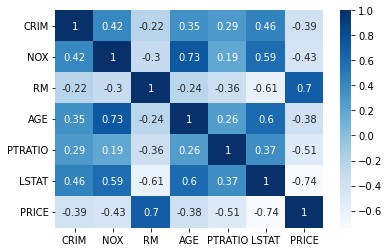

In [ ]:
# visualize heatmap with correlation values
sns.heatmap(corr, cmap='Blues', annot=True)

Features with a correlation of 0.5 or greater with PRICE:
- RM
- PTRATIO
- LSTAT

## 2. Select columns for your feature matrix (X) and select price for your target vector (y).

In [ ]:
# validation split
X = df[['RM', 'PTRATIO','LSTAT']].copy()
y = df['PRICE'].copy()

## 3. Split your data into train and test groups. Please use random number 42 for consistency!

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,RM,PTRATIO,LSTAT
182,7.155,17.8,4.82
155,6.152,14.7,15.02
280,7.820,14.9,3.76
126,5.613,19.1,27.26
329,6.333,16.9,7.34


## 4. Instantiate your model and fit it on the training set.

> All columns are type float and there are no missing values in the dataset. Therefore, we will only need to utilize the StandardScaler for our model. 

In [ ]:
# instantiate scaler
scaler = StandardScaler()

In [ ]:
# instantiate the linear regression model
linreg = LinearRegression()

In [ ]:
# Create model pipeline with scaler first then linear regression model
regression_pipe = make_pipeline(scaler, linreg)

In [ ]:
# fit pipeline to training data
regression_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
# make predictions using training and testing data
train_pred = regression_pipe.predict(X_train)
test_pred = regression_pipe.predict(X_test)

## 5. Evaluate your model performance using R^2 on the training set and on the test set. Is there a difference between model performance on the training data vs the test data?

In [ ]:
# calculate and display r2 score for training and test sets
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f'Model Train R2: {train_r2}')
print(f'Model Test R2: {test_r2}')

Model Train R2: 0.6877966145058925
Model Test R2: 0.6331590458194676


> The model performed better on the Training set as opposed to the Test set by a difference in R^2 of approximately 5.5%. R^2 score for the training set is 68.8% and for the testing set is 63.3%.

## 6. Evaluate your model using mean absolute error (MAE).

In [ ]:
# calculate and display MAE for training and test sets
train_MAE = mean_absolute_error(y_train, train_pred)
test_MAE = mean_absolute_error(y_test, test_pred)

print(f'Model Train MAE: {train_MAE}')
print(f'Model Test MAE: {test_MAE}')

Model Train MAE: 3.714054057158005
Model Test MAE: 3.3918448293813976


> According to the MAE metric, or model was off by \$3.71 for the training set, and \$3.39 for the testing set. The model was fairly close for both the training and test sets. 

## 7. Evaluate your model using mean squared error (MSE).

In [ ]:
# calculate and display MSE for training and test sets
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

print(f'Model Train MSE: {train_MSE}')
print(f'Model Test MSE: {test_MSE}')

Model Train MSE: 27.68673681796949
Model Test MSE: 25.688824196675963


> According to MSE metric, or model was off by \$27.69 for the training set, and \$25.69 for the test set. Again, the model is fairly close for both sets, MSE is not in the same scale as the price column, so it is hard to tell by exactly how much it is off. 

## 8. Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars.

In [ ]:
# calculate and display RMSE for training and test sets
train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))

print(f'Model Train RMSE: {train_RMSE}')
print(f'Model Test RMSE: {test_RMSE}')

Model Train RMSE: 5.261818774717492
Model Test RMSE: 5.0684143671049595


> According to RMSE metric, our model was off by \$5.26 for the training set, and \$5.07 for the test set. This is a larger deviation (in the same scale as our price column) than we saw with the MAE metric. Again, it shows a smaller deviation with the Test set than with the Training set. 